In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

### Binomial Distribution

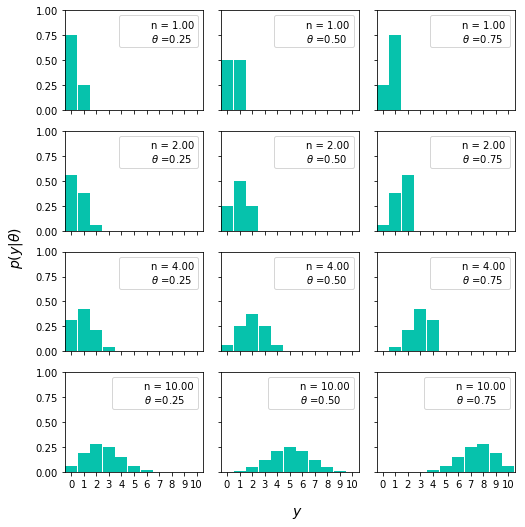

In [36]:
n_params = [1, 2, 4, 10]
p_params = [0.25, 0.5, 0.75]

x = np.arange(0, max(n_params)+1)

f, ax = plt.subplots(len(n_params), len(p_params), sharex=True, sharey=True, figsize=(7,7))

for i in range(len(n_params)):
    for j in range(len(p_params)):
        n = n_params[i]
        p = p_params[j]
        
        y = stats.binom(n=n, p=p).pmf(x)
        
        ax[i,j].vlines(x, 0, y, colors='xkcd:turquoise', lw=12)
        ax[i,j].set_ylim(0, 1)
        ax[i,j].plot(0, 0, label="n = {:3.2f}\n$\\theta$ ={:3.2f}".format(n,p), alpha=0)
        ax[i,j].legend()

ax[0,0].set_xticks(x)
f.text(-0.035, 0.5, '$p(y|\\theta)$', fontsize=14, va='center', rotation='vertical')
f.text(0.54, -0.03, '$y$', fontsize=14, ha='center')
plt.tight_layout()
plt.show()

### Beta Distribution

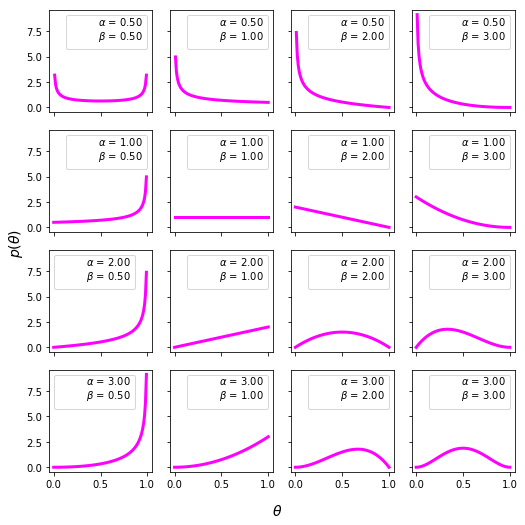

In [50]:
params = [0.5, 1, 2, 3]

x = np.linspace(0, 1, 100)

f, ax = plt.subplots(len(params), len(params), sharex=True, sharey=True, figsize=(7,7))

for i in range(4):
    for j in range(4):
        a = params[i]
        b = params[j]
        
        y = stats.beta(a, b).pdf(x)
        
        ax[i,j].plot(x, y, color='#FF00FF', lw=3)
        ax[i,j].plot(0, 0, label="$\\alpha$ = {:3.2f}\n$\\beta$ = {:3.2f}".format(a, b), alpha=0)
        ax[i,j].legend(fontsize=10)

f.text(-0.035, 0.51, '$p(\\theta)$', fontsize=14, va='center', rotation='vertical')
f.text(0.5, -0.03, '$\\theta$', fontsize=14, ha='center')
plt.tight_layout()
plt.show()